In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
titanic_set = pd.read_csv('titanic_train.csv')

In [3]:
titanic_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Let's clean the data

In [4]:
titanic_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


There are some missing data 

<AxesSubplot:>

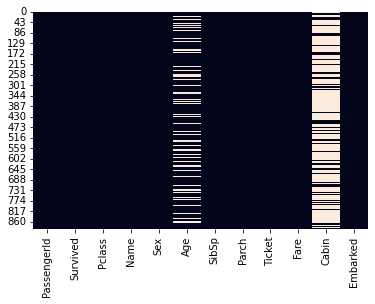

In [5]:
sns.heatmap(titanic_set.isnull(), cbar = False)

Let's visualise more

<AxesSubplot:xlabel='Survived', ylabel='count'>

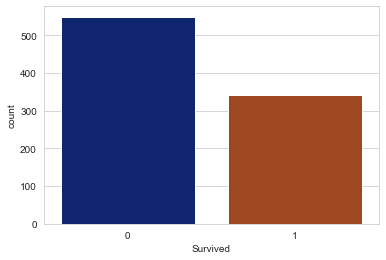

In [6]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', data = titanic_set, palette = 'dark')

<AxesSubplot:xlabel='Survived', ylabel='count'>

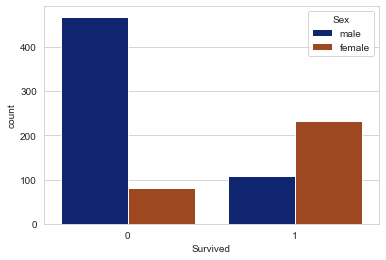

In [7]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', hue = 'Sex', data = titanic_set, palette = 'dark')

<AxesSubplot:xlabel='Survived', ylabel='count'>

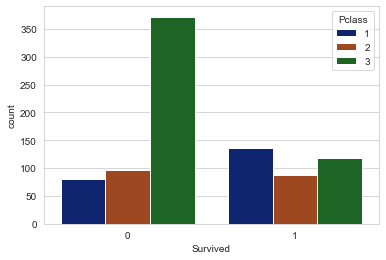

In [8]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', hue = 'Pclass', data = titanic_set, palette = 'dark')

C:\Users\odita\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

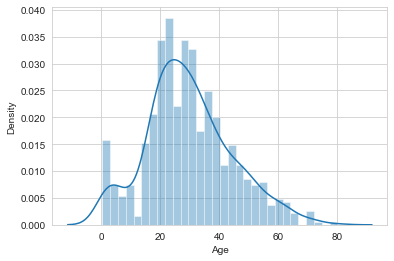

In [9]:
sns.distplot(titanic_set['Age'].dropna(), bins = 30)

<AxesSubplot:>

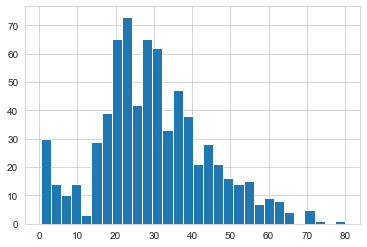

In [10]:
titanic_set['Age'].hist(bins = 30, alpha = 1)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

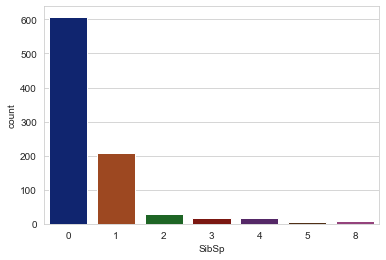

In [11]:
sns.countplot(x = 'SibSp', data = titanic_set, palette = 'dark')

<AxesSubplot:>

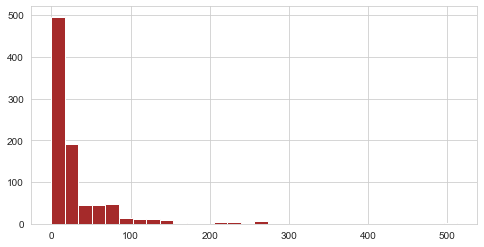

In [12]:
titanic_set['Fare'].hist(bins = 30, color = 'brown', figsize = (8, 4))

Fill in missing data

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

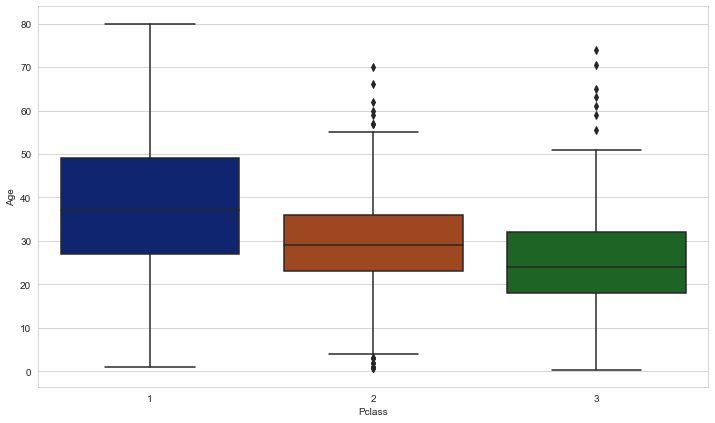

In [13]:
plt.figure(figsize = (12,7))
sns.boxplot(x = 'Pclass', y = 'Age', data = titanic_set, palette = 'dark')

Let's create a function to fill up the missing ages in the data

In [14]:
def fill_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else: 
            return 24
    else: 
        return Age

Now, let's apply the function

In [15]:
titanic_set['Age'] = titanic_set[['Age', 'Pclass']].apply(fill_age, axis = 1)

Now, let's check the data again using a heatmap

<AxesSubplot:>

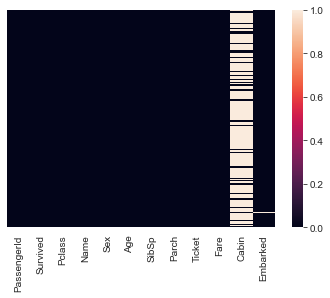

In [16]:
sns.heatmap(titanic_set.isnull(), yticklabels = False)

Now, there's no use filling the absent data in the cabin column (i'll find out why exactly later)

In [17]:
titanic_set.drop('Cabin', axis = 1, inplace = True)

In [18]:
titanic_set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [19]:
titanic_set.dropna(inplace = True)

In [20]:
sex = pd.get_dummies(titanic_set['Sex'], drop_first = True)
embark = pd.get_dummies(titanic_set['Embarked'], drop_first = True)

Let's drop all text data(i'll also find out why later)

In [21]:
titanic_set.drop (['Sex', 'Embarked', 'Name', 'Ticket'], axis = 1, inplace = True)

To create dummy variables we need to create new sex and embark columns

In [22]:
titanic_set = pd.concat([titanic_set, sex, embark], axis = 1)

In [23]:
titanic_set.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


Now, let's build our model 

### Train Test Split

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(titanic_set.drop('Survived', axis = 1), titanic_set['Survived'], test_size=0.3, random_state=101)

Now, let's train

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
logmodel = LogisticRegression(solver = 'liblinear')
logmodel.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [28]:
predictions = logmodel.predict(X_test)

Now, we evaluate the model

In [29]:
from sklearn.metrics import classification_report

In [30]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.93      0.86       163
           1       0.85      0.65      0.74       104

    accuracy                           0.82       267
   macro avg       0.83      0.79      0.80       267
weighted avg       0.82      0.82      0.81       267



In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [34]:
print(confusion_matrix(y_test, predictions))

[[151  12]
 [ 36  68]]


In [35]:
print(f'Accuracy score: {accuracy_score(y_test, predictions)}')

Accuracy score: 0.8202247191011236
